In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load image and convert to grayscale
path = "./images/"
img = cv2.imread(path + "messi.png")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

## Gaussian Noise

In [19]:
def pad_img(img, kernel_size):
    pad_size = int(np.floor(kernel_size/2))
    padded_image = np.pad(img, pad_width=pad_size, mode="constant", constant_values=0)
    return padded_image

In [20]:
def apply_filter(img, filter):
    h, w = img.shape
    kernel_size = filter.shape[0]
    padded_image = pad_img(img, kernel_size)
    output_img = np.zeros_like(img)
    for i in range(0, h):
        for j in range(0, w):
            output_img[i, j] = np.sum(filter * padded_image[i:i+kernel_size, j:j+kernel_size])
    return output_img

In [21]:
def gaussian_filter(img):
    # Compute gaussina kernel

    gaussian = 1/16 * np.array([
        [1, 2, 1], 
        [2, 4, 2], 
        [1, 2, 1]])

    return apply_filter(img, gaussian)




gaussian_img = gaussian_filter(gray)

In [22]:
def box_filter(img, kernel_size=3):
    normalize = 1/(kernel_size * kernel_size)
    box = normalize * np.ones(shape=(kernel_size, kernel_size))
    return apply_filter(img, box)

box_img = box_filter(gray)

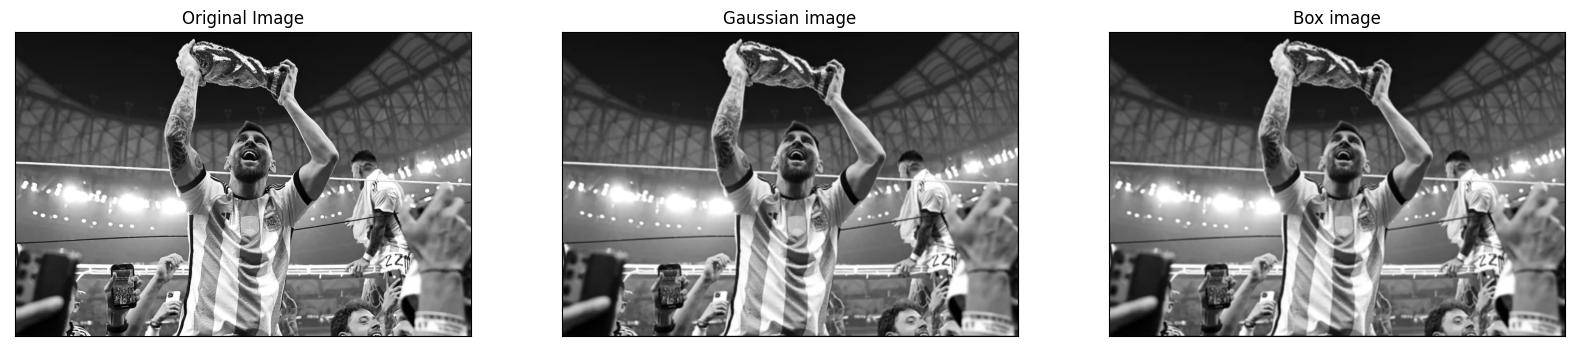

In [23]:

plt.figure(figsize=(20, 20))

plt.subplot(1,3,1)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.title("Gaussian image"), plt.xticks([]), plt.yticks([])
plt.imshow(gaussian_img, cmap='gray')

plt.subplot(1,3,3)
plt.title("Box image"), plt.xticks([]), plt.yticks([])
plt.imshow(box_img, cmap='gray')


We can see from the value of the PSNR that the gaussian filter gives better results. 

In [24]:
# PSNR value for the images
print('PSNR for gaussian filter: ', cv2.PSNR(gray, gaussian_img))
print('PSNR for box filter:', cv2.PSNR(gray, box_img))


PSNR for gaussian filter:  29.899731808268946
PSNR for box filter: 27.774405470197628


## Salt and pepper noise

In [25]:
sp_img = cv2.imread(path + 'salt-and-pepper-messi2.png')
sp_img = cv2.cvtColor(sp_img, cv2.COLOR_RGB2GRAY)


In [26]:
def median_filter(img, kernel_size=3):
    h, w = img.shape
    padded_image = pad_img(img, kernel_size)
    output_img = np.zeros_like(img)  
    for i in range(0, h):
        for j in range(0, w):
            output_img[i, j] = np.median(padded_image[i:i+kernel_size, j:j+kernel_size])
    return output_img


In [27]:
gaussian_sp_img = gaussian_filter(sp_img)
median_sp_img = median_filter(sp_img)

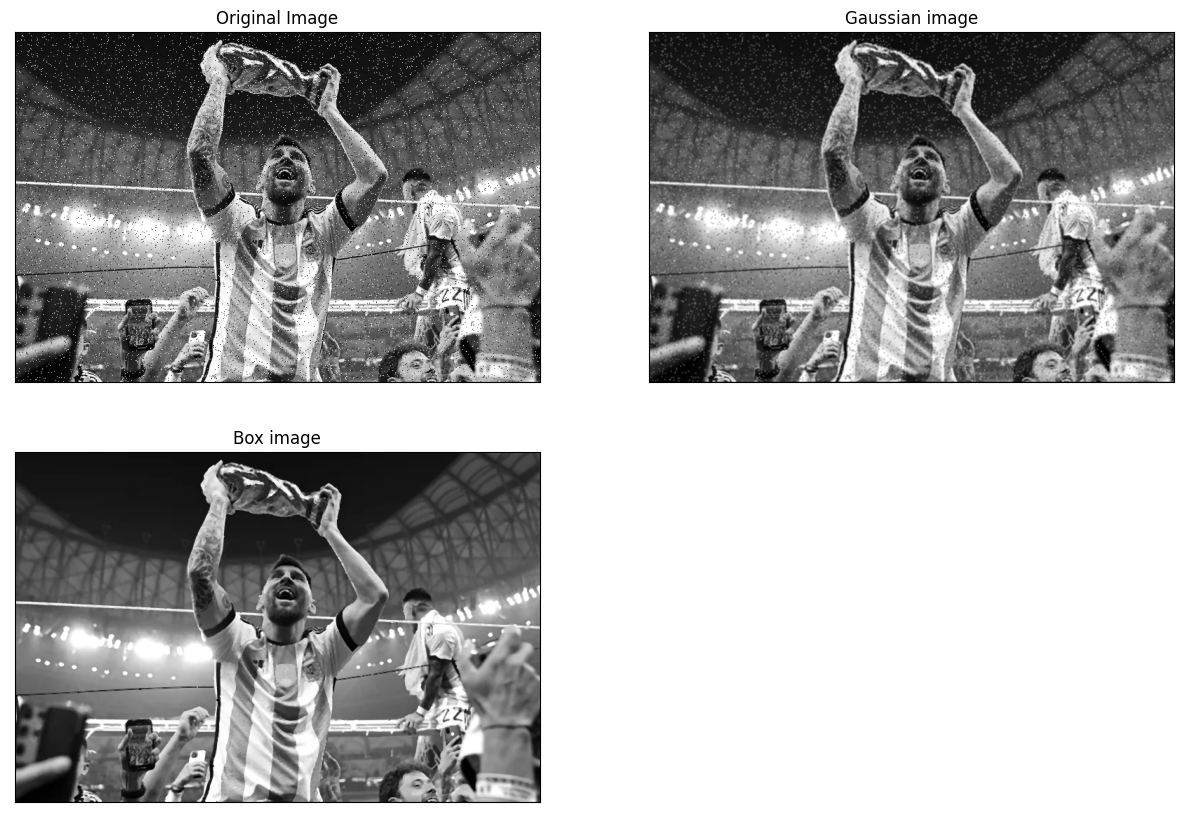

In [28]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.imshow(sp_img, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2)
plt.title("Gaussian image"), plt.xticks([]), plt.yticks([])
plt.imshow(gaussian_sp_img, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Box image"), plt.xticks([]), plt.yticks([])
plt.imshow(median_sp_img, cmap='gray')


We can see from the value of the PSNR that the median filter gives better results. 

In [29]:
# PSNR value for the images
print('PSNR for gaussian filter: ', cv2.PSNR(gray, gaussian_sp_img))
print('PSNR for median filter:', cv2.PSNR(gray, median_sp_img))


PSNR for gaussian filter:  24.517999955284186
PSNR for median filter: 29.7365502701187


4. Describe the discrepancies between the two reference corrupted images: How are Gaussian
noise and salt and pepper noise different? What is the best denoising method for these two
types of noisy images? (You can use your findings and materials discussed in the classroom)

Possible filters:
1. Gaussian: a gaussian filter performs a weighted sum of the neighbours 
3. Box: a box filter replace each pixel with the average of its neighborhood.
2. Median: a median filter selects the median value of our kernel.

Possible noises:
1. Salt and pepper noise is an impulse and multiplicative type of noise and it is caused by errors in transmission, analog digital error etc.
In an image with S&P noise we have pixels that results to have values in the extremes of their possible range of values.
A noise pixel diffears significantly from its neighbours. To denoise an image affected by salt and pepper a median filter can be a good solution.
For this type of noise we know that is really sparse and for this reason, in a median filter, it is unlike to have the noise pixel in the middle position. The gaussian filter does not really work because propagates the error to its neighbours.

2. The gaussian noise is an additive type of noise $$noise\_img(x, y) = original(x, y) + noise(x,y)$$
where the value of the pertubation comes from a normal probability distribution.
A gaussian filter removes the high-frequencies components of the images giving a smooth effect to that.
Unlike the box filter this one gives, more weight to the pixel near the center of the window then far ones. Usually a gaussian filter produce better results than a box filter  

# Canny edge detector

The canny edge detector is composed by four step:
1. filter the image using the x and y derivate of Gaussian
2. compute the magnitude and the orientation of the gradient
3. perform non maxima suppresion to have nice thin edges
4. hysteresis, used to connect disconnected edges. It uses two thresholds: one for find edges and the other to connect different edges

In [31]:
canny_img = cv2.imread(path + "cntower.jpg")
canny_img = cv2.cvtColor(canny_img, cv2.COLOR_RGB2GRAY)

In [34]:
def edge_detector(img, kernel_size, low, high):
    blurred = cv2.GaussianBlur(img, kernel_size, sigmaX=3)
    edges = cv2.Canny(blurred, low, high)
    return edges, blurred

/tmp/ipykernel_12137/2377559560.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows, columns, i+1)


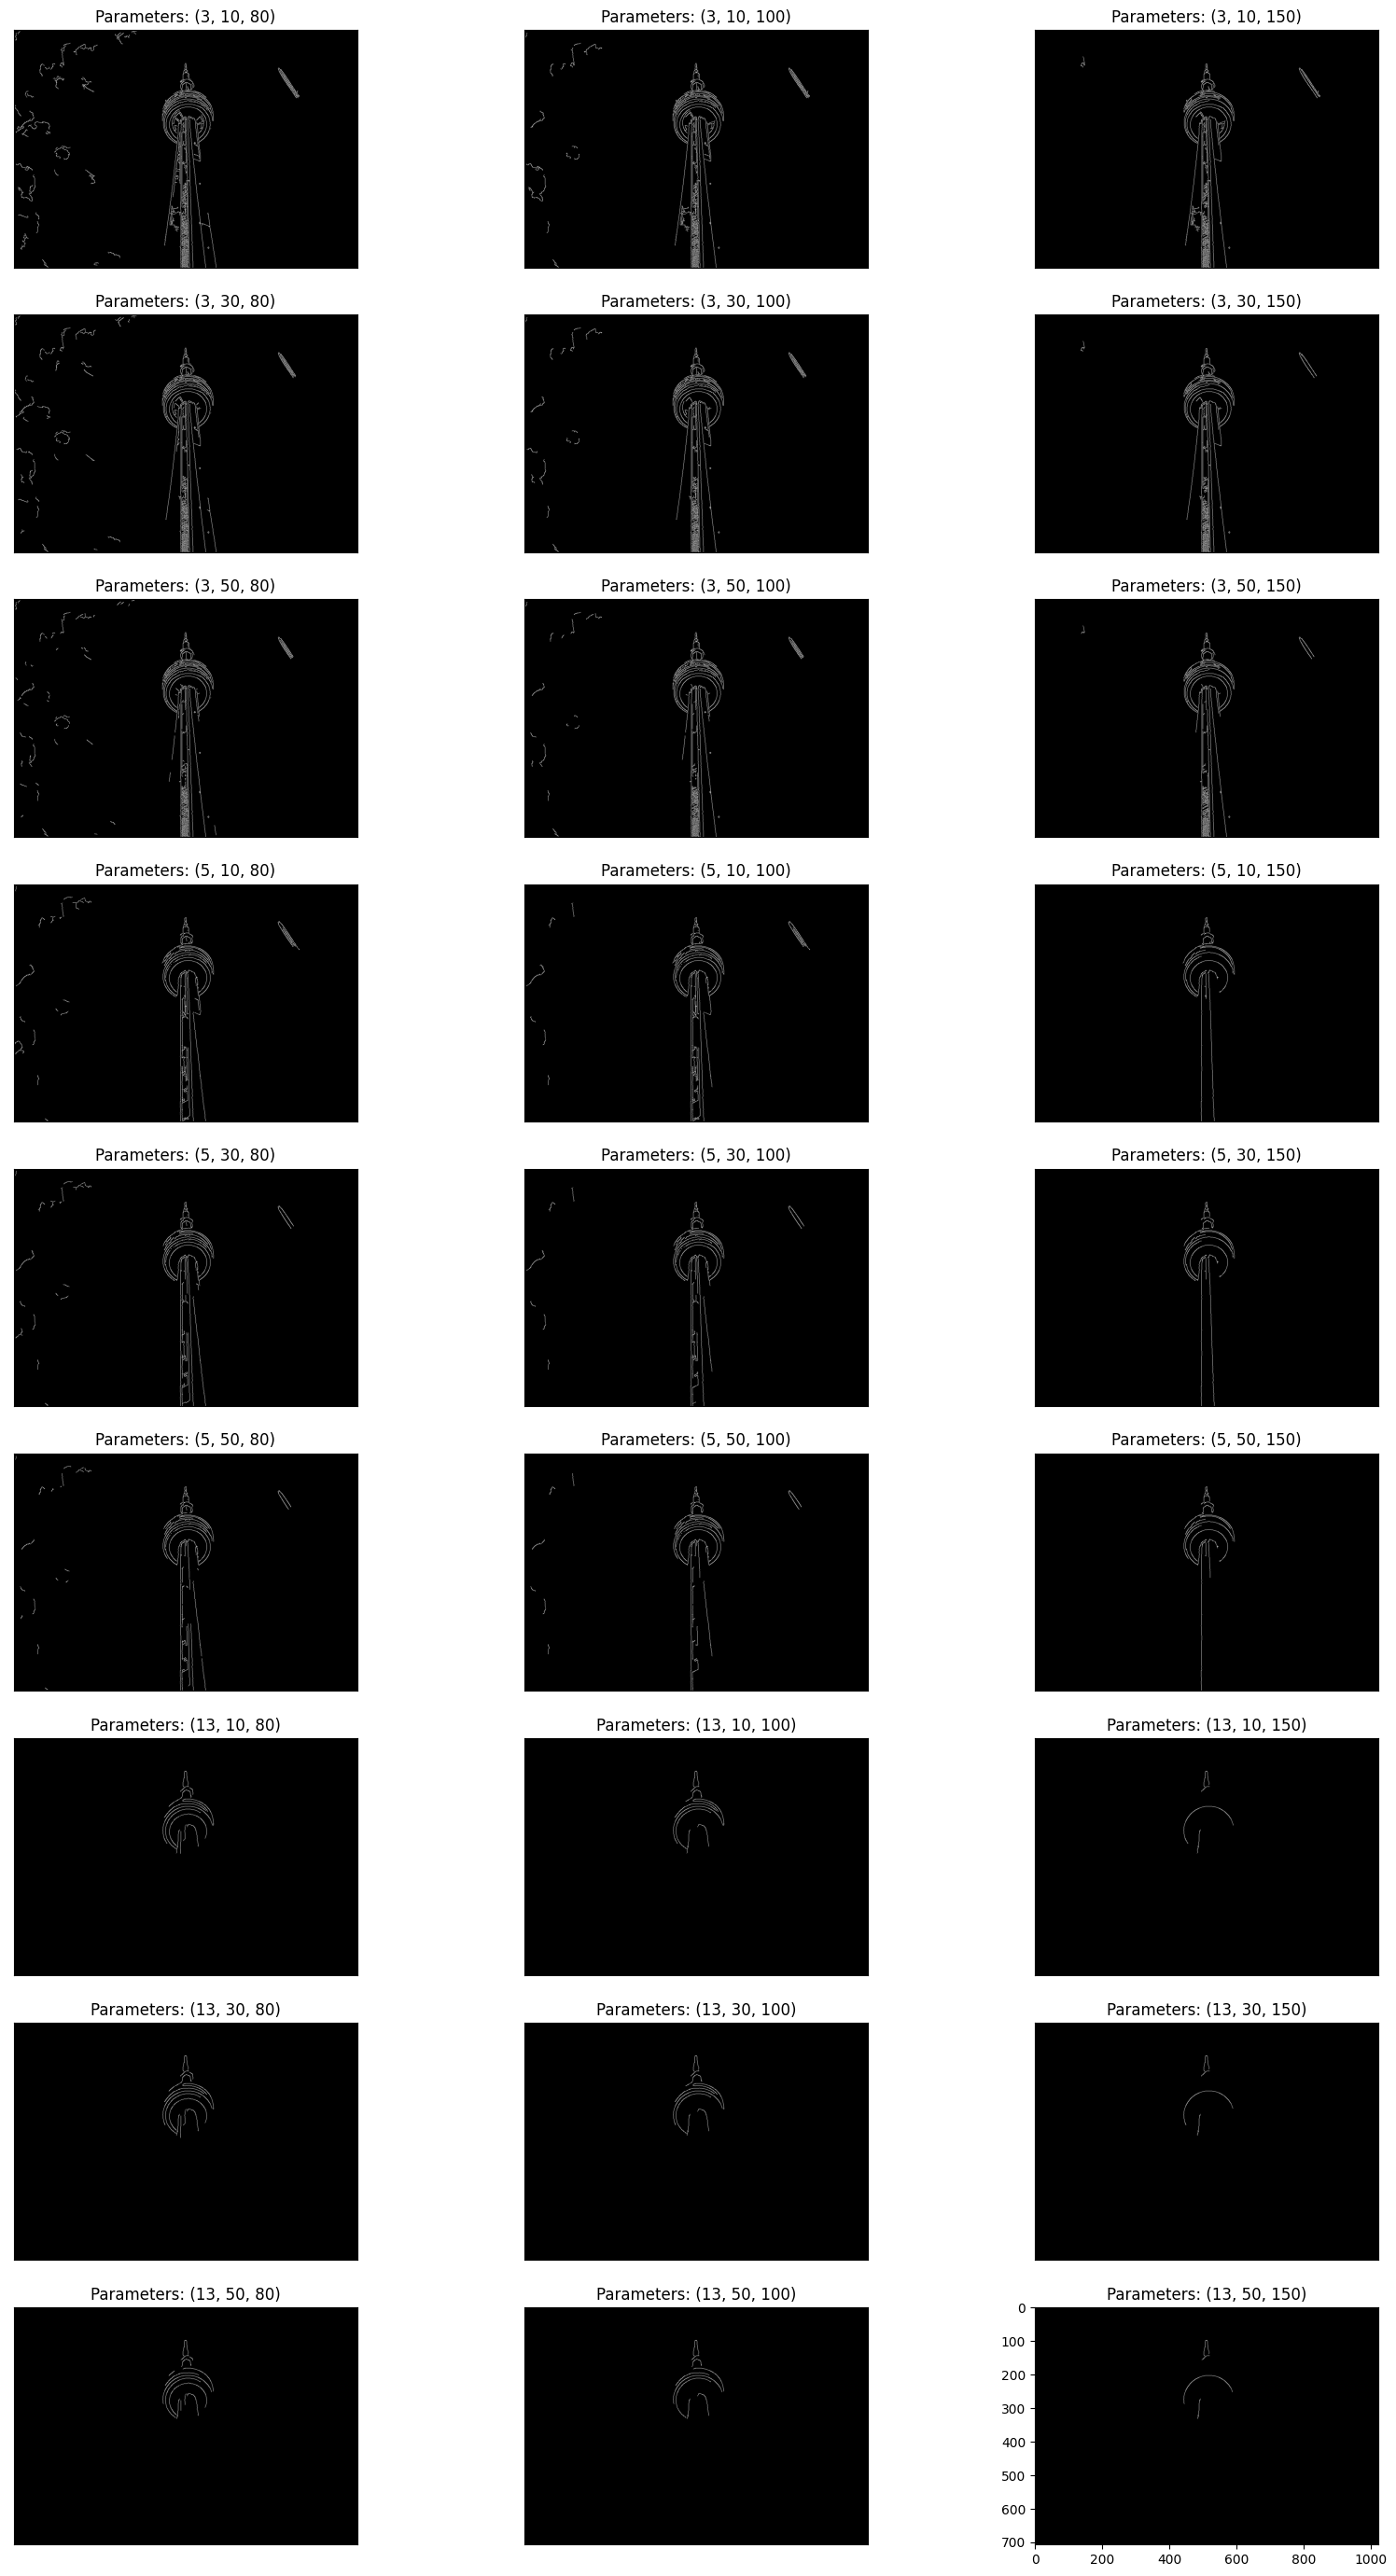

In [80]:
import itertools
#edges = edge_detector(canny_img, (3,3), 10, 80)
params = [
    [3, 5, 13],
    [10, 30, 50],
    [80, 100, 150]
]



columns = 4
total = 1
for x in params:
    total = total * len(x)

rows = int(np.ceil(total / columns))


plt.figure(figsize=(20, 35))
for i, combination in enumerate(itertools.product(*params)):
    ksize, low, high = combination
    edges, blurred = edge_detector(canny_img, (ksize, ksize), low, high)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(rows, columns, i+1)
    plt.title(f"Parameters: {combination}")
    plt.imshow(edges, cmap="gray")


2.3 Describe how changing values of each parameter (K, L, U) affects the overall edge detection
results. Is there any relationship between parameters?

The three parameters used for the edge detection are:
1. Gaussian size: a bigger kernel size of this filter makes the image more smooth making the edge detection more difficult. From the plots we can easily see that with a large size of the kernel less edges are detected.
2. Low threshold: used in the hysteresis process, a low value makes more edges connected between them, with an high value there are less conncetion between edges. We can notice that with the value of 10 there some edges that are not relevant while with the value of 50 we lose the main edges of the tower
3. High threshold: its values regulates which pixels becomes edges and which not. In the figure an high value of this threshold implies less edges in the image (we cann see how the clouds edges disappears). With the lowest value of this parameter a lot of less important edges are displayed and connected following the low value of the thresholding implying a more confused image. 